<a href="https://colab.research.google.com/github/LidiiaMelnyk95/FSU_Jena_scripts/blob/main/Create_data_frame_from_Ukrainian_corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle-3.json to kaggle-3 (1).json


{'kaggle-3.json': b'{"username":"lidiiamelnyk","key":"af02ac046b9491614890bbb7dfecd5bb"}'}

In [ ]:
!touch ~/.kaggle/kaggle.json

api_token = {"username":"username","key":"api-key"}

import json

with open('/kaggle-3.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

touch: cannot touch '/root/.kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# Neuer Abschnitt

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

api_token = {"username":"lidiiamelnyk","key":"af02ac046b9491614890bbb7dfecd5bb"}

import json

with open('/content/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/kaggle.json
! kaggle datasets download bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows

100% 16.7G/16.7G [04:11<00:00, 93.2MB/s]
100% 16.7G/16.7G [04:11<00:00, 71.1MB/s]


In [ ]:
!unzip /content/ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip

***Process the unzip dfs***

In [ ]:
import pandas as pd
import glob

# Initialize an empty list to store DataFrames
dfs = []

# List of file groups
file_groups = [
    glob.glob('/content/*.gzip')[:20],
    glob.glob('/content/*.gzip')[20:40],
    glob.glob('/content/*.gzip')[40:60],
    glob.glob('/content/*.gzip')[:20],
    glob.glob('/content/*.gzip')[40:60],
    glob.glob('/content/*.gzip')[60:80],
    glob.glob('/content/*.gzip')[80:100],
    glob.glob('/content/*.gzip')[100:120],
    glob.glob('/content/*.gzip')[120:140],
    glob.glob('/content/*.gzip')[140:160],
    glob.glob('/content/*.gzip')[160:180],
    glob.glob('/content/*.gzip')[180:200],
    glob.glob('/content/*.gzip')[200:220],
    glob.glob('/content/*.gzip')[220:240],
    glob.glob('/content/*.gzip')[240:]
]

# Iterate through file groups
for files in file_groups:
    # Initialize an empty DataFrame for the current group
    group_df = pd.DataFrame()

    # Iterate through files in the current group
    for file in files:
        # Read the DataFrame and filter by location
        df1 = pd.read_csv(file, compression='gzip', index_col=0, encoding='utf-8', quoting=csv.QUOTE_ALL)
        df1 = df1[df1.location == 'Ukraine']

        # Append the filtered DataFrame to the current group
        group_df = group_df.append(df1, ignore_index=True)

    # Append the current group DataFrame to the list
    dfs.append(group_df)

# Concatenate all DataFrames in the list into one
df_concat = pd.concat(dfs, ignore_index=True)

# Display the shape of the resulting DataFrame
print(df_concat.shape)


In [ ]:
df_concat = pd.concat([df, df1])
df_concat = df_concat.drop_duplicates(subset = 'tweetid')
df_concat = df_concat[df_concat['is_retweet']!=True]

In [ ]:
df_concat.shape

(435135, 31)

In [ ]:
#process data formatting
from datetime import datetime
input_format = "%Y-%m-%d %H:%M:%S"
output_format = "%B %d, %Y"
df_concat = df_concat[df_concat['tweetcreatedts'] != "0.0"]
df_concat['Formatted_Date'] = pd.to_datetime(df_concat['tweetcreatedts'], format=input_format).dt.strftime(output_format)


***Monthly visualisation***

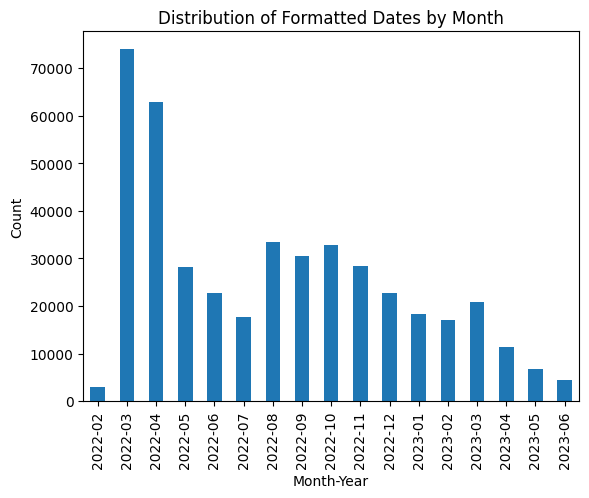

In [ ]:
import matplotlib.pyplot as plt

df_concat['Month_Year'] = pd.to_datetime(df_concat['Formatted_Date']).dt.to_period('M')

# Count the occurrences of each unique month-year value
month_year_counts = df_concat['Month_Year'].value_counts()

# Sort the values by the month-year index
month_year_counts = month_year_counts.sort_index()

# Create a bar plot
month_year_counts.plot(kind='bar')

# Customize the plot
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Distribution of Formatted Dates by Month')

# Display the plot
plt.show()

In [ ]:
df_concat['Month_Year'].value_counts()

2022-03    73992
2022-04    62958
2022-08    33401
2022-10    32814
2022-09    30505
2022-11    28437
2022-05    28237
2022-06    22682
2022-12    22619
2023-03    20801
2023-01    18340
2022-07    17705
2023-02    16943
2023-04    11396
2023-05     6720
2023-06     4517
2022-02     3066
Freq: M, Name: Month_Year, dtype: int64

In [ ]:
df_concat['username'].value_counts()

UkraineAlert      29803
UKRWarSitRep      12370
u24_news           7822
EuromaidanPR       6555
UATV_en            6392
                  ...  
ModernMaan            1
ukraine_fight9        1
hereismixall          1
www332022             1
realVictorReal        1
Name: username, Length: 15096, dtype: int64

In [ ]:
df_concat.to_csv('corpus_data_ukraine_russia_full.csv')